In [1]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

### 1. PCA

In [2]:
file_path = 'winequality-white.csv'
df = pd.read_csv(file_path, sep=';')

In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [5]:
features = df.drop(columns=['quality'])

In [6]:
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

In [7]:
pca = PCA(n_components=2)

In [8]:
features_pca = pca.fit_transform(features_scaled)

In [49]:
kmeans_pca = KMeans(n_clusters=4, random_state=42)
labels_pca = kmeans_pca.fit_predict(features_pca)

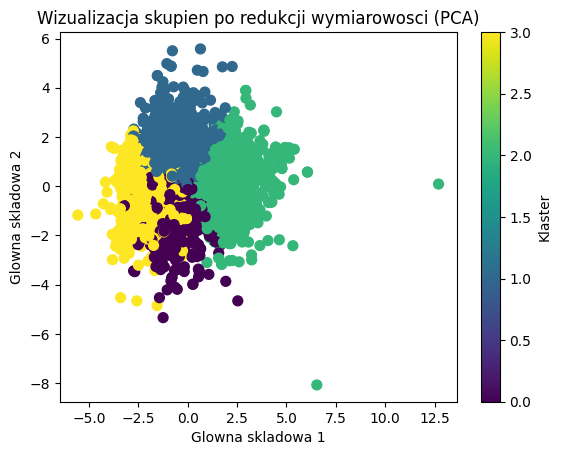

In [50]:
plt.scatter(features_pca[:, 0], features_pca[:, 1], c=labels_pca, cmap='viridis', s=50)
plt.xlabel('Glowna skladowa 1')
plt.ylabel('Glowna skladowa 2')
plt.title('Wizualizacja skupien po redukcji wymiarowosci (PCA)')
plt.colorbar(label='Klaster')
plt.show()

In [13]:
#PORÓWNANIE WYNIKÓW PRZED I PO REDUKCJI WIELOWYMIAROWOŚCI - KORZYSTAMY ZE WSPÓŁCZYNNIKA SILHOUETTE
from sklearn.metrics import silhouette_score

In [14]:
silhouette_pca = silhouette_score(features_pca, labels_pca)
print(f"Silhouette Score (PCA-transformed data): {silhouette_pca:.2f}")

Silhouette Score (PCA-transformed data): 0.38


In [15]:
kmeans_original = KMeans(n_clusters=3, random_state=42)
labels_original = kmeans_original.fit_predict(features_scaled)
silhouette_original = silhouette_score(features_scaled, labels_original)

In [16]:
print(f"Silhouette Score (original data): {silhouette_original:.2f}")

Silhouette Score (original data): 0.14


### 2. METODY NIEHIERARCHICZNE

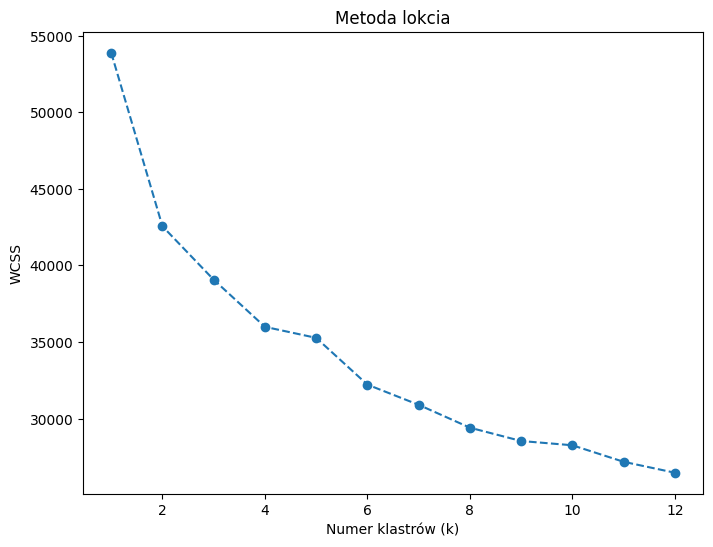

In [17]:
wcss = []
k_values = range(1, 13)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(k_values, wcss, marker='o', linestyle='--')
plt.title('Metoda lokcia')
plt.xlabel('Numer klastrów (k)')
plt.ylabel('WCSS')
plt.show()

In [18]:
#wybieramy k=3

In [41]:
optimal_k = 3

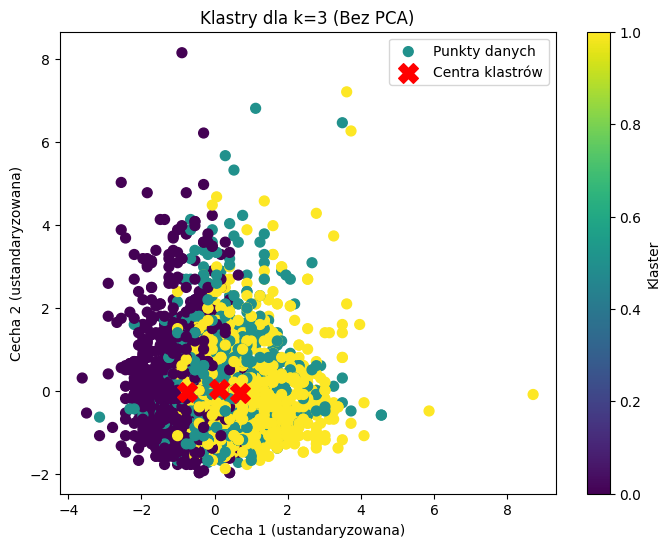

In [66]:
kmeans_optimal = KMeans(n_clusters=optimal_k, random_state=42)
labels_optimal = kmeans_optimal.fit_predict(features_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(features_scaled[:, 0], features_scaled[:, 1], c=labels_optimal, cmap='viridis', s=50, label='Punkty danych')
plt.scatter(kmeans_optimal.cluster_centers_[:, 0], kmeans_optimal.cluster_centers_[:, 1],
            c='red', marker='X', s=200, label='Centra klastrów')
plt.xlabel('Cecha 1 (ustandaryzowana)')
plt.ylabel('Cecha 2 (ustandaryzowana)')
plt.title(f'Klastry dla k={optimal_k} (Bez PCA)')
plt.colorbar(label='Klaster')
plt.legend()
plt.show()


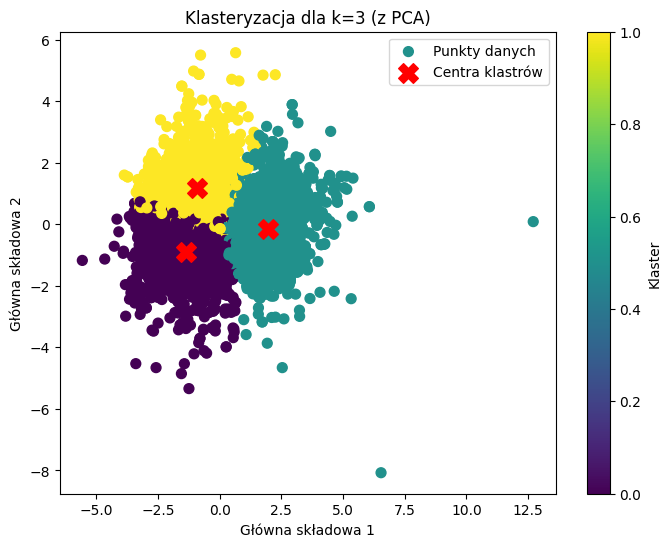

In [65]:
kmeans_optimal = KMeans(n_clusters=optimal_k, random_state=42)
labels_optimal = kmeans_optimal.fit_predict(features_scaled)

pca = PCA(n_components=2)
features_pca = pca.fit_transform(features_scaled)

cluster_centers_pca = pca.transform(kmeans_optimal.cluster_centers_)

plt.figure(figsize=(8, 6))
plt.scatter(features_pca[:, 0], features_pca[:, 1], c=labels_optimal, cmap='viridis', s=50, label='Punkty danych')
plt.scatter(cluster_centers_pca[:, 0], cluster_centers_pca[:, 1],
            c='red', marker='X', s=200, label='Centra klastrów')
plt.xlabel('Główna składowa 1')
plt.ylabel('Główna składowa 2')
plt.title(f'Klasteryzacja dla k={optimal_k} (z PCA)')
plt.colorbar(label='Klaster')
plt.legend()
plt.show()


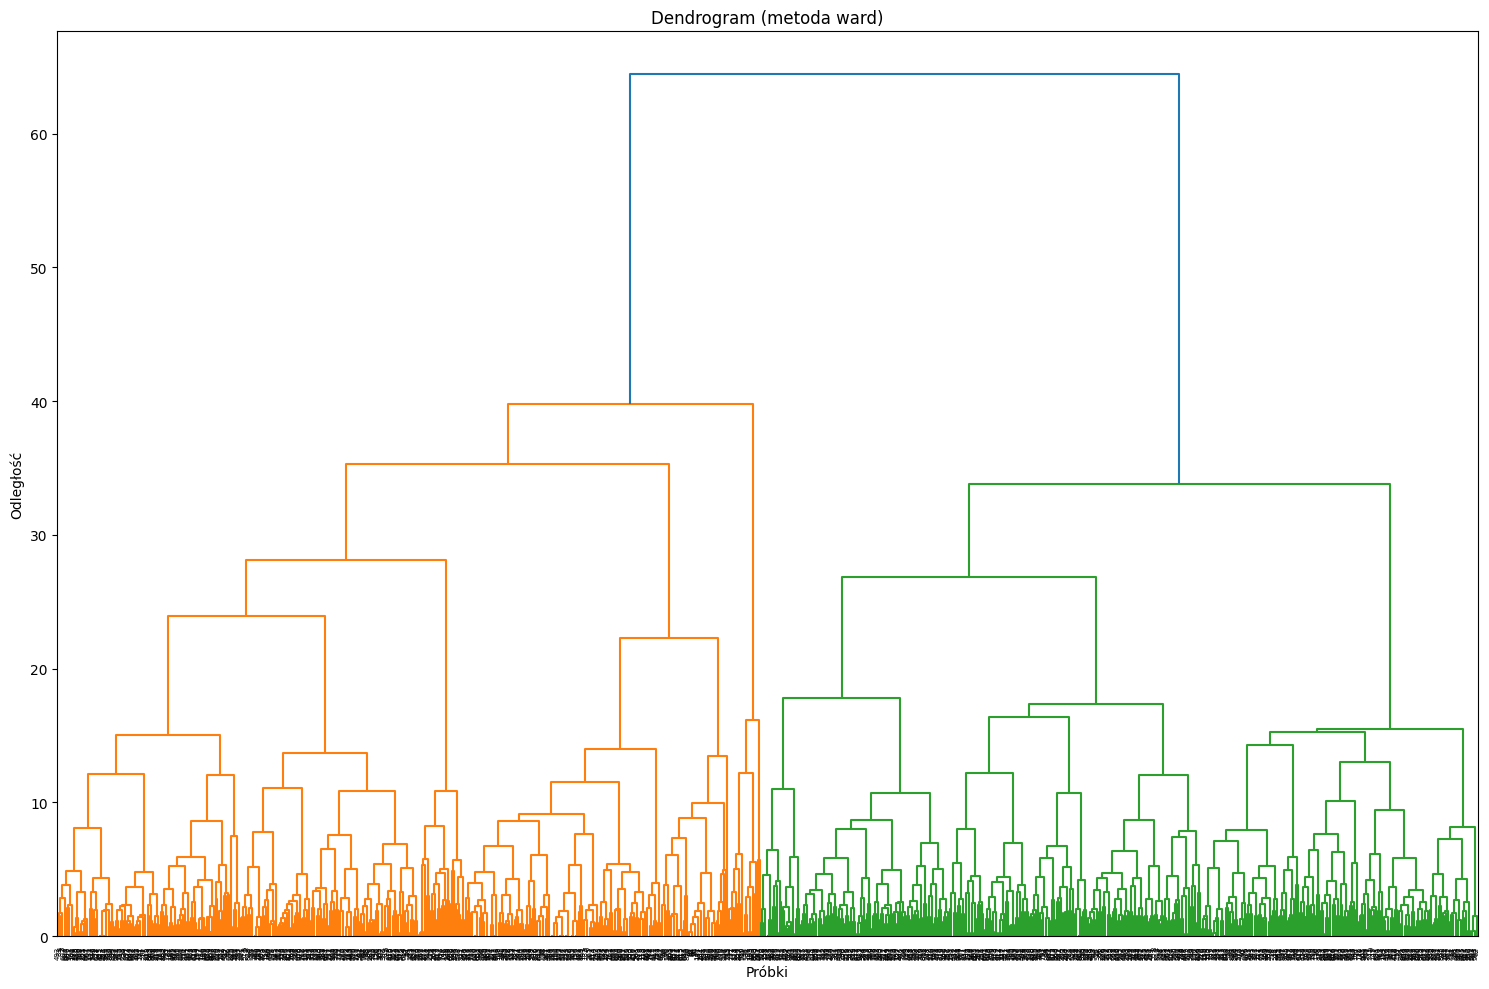

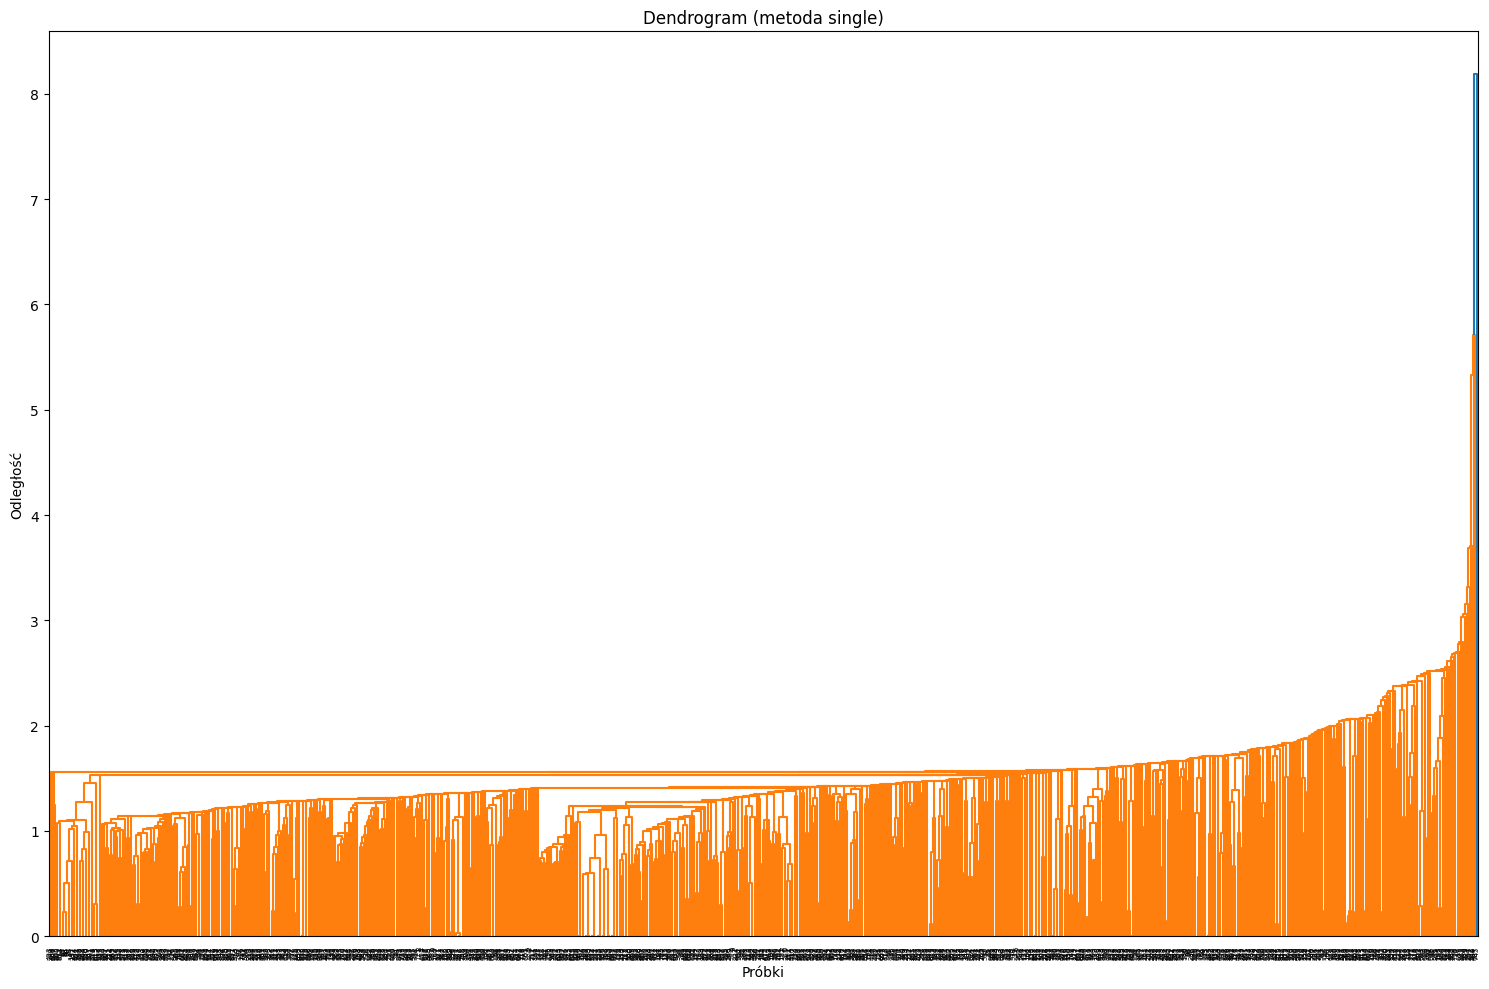

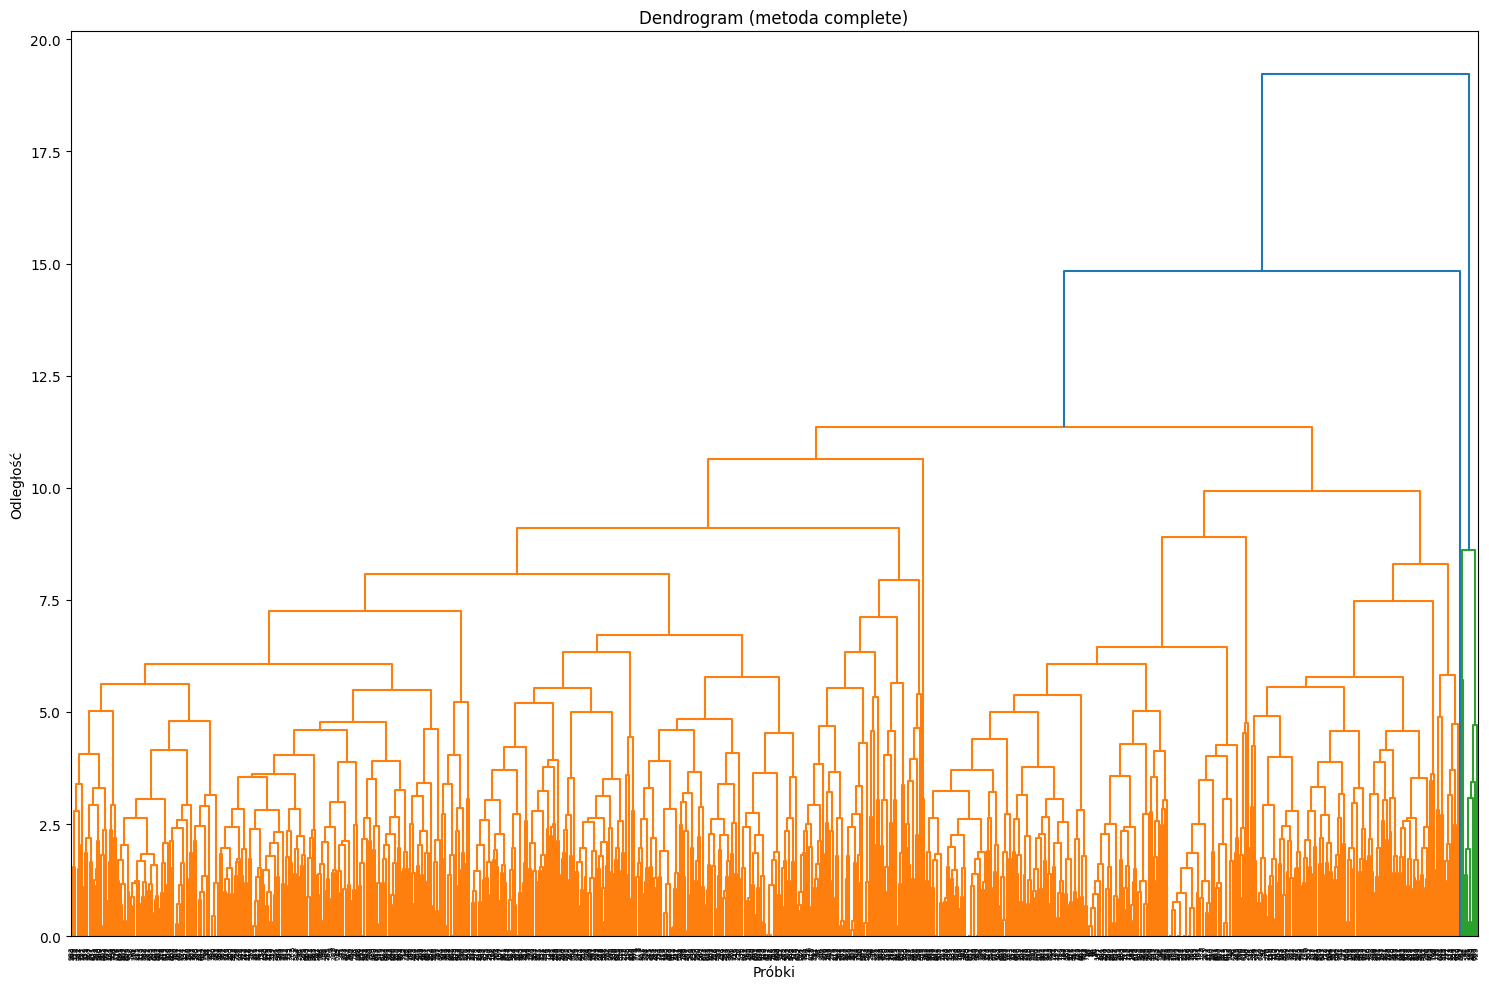

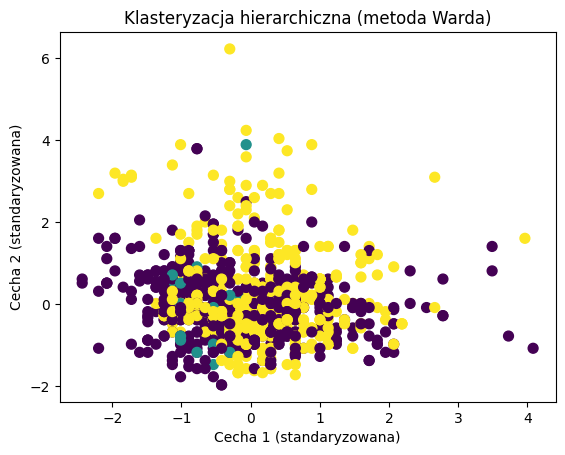

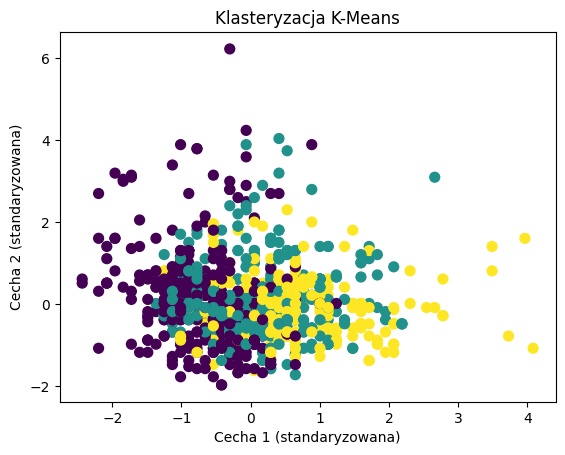

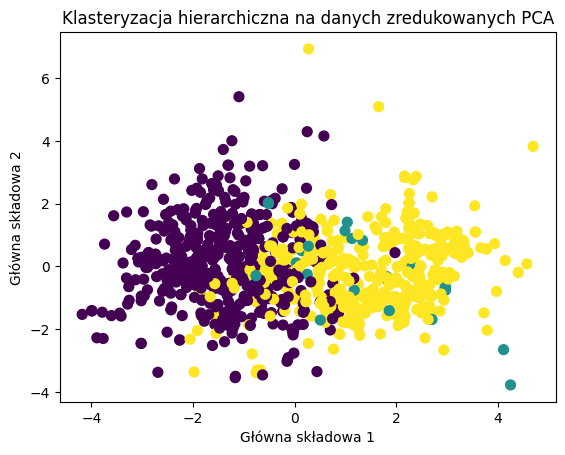

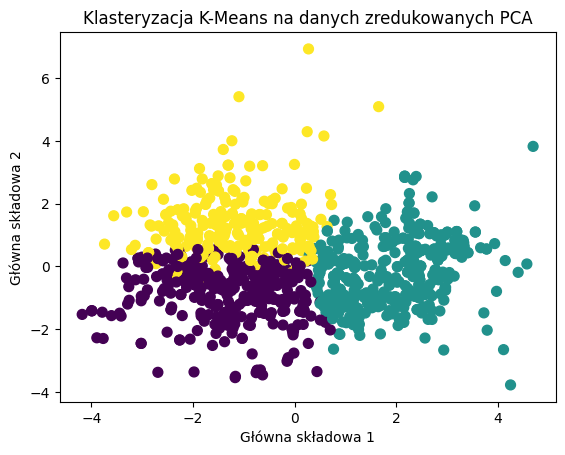

In [72]:
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

cechy = df.drop(columns=['quality'])
scaler = StandardScaler()
dane_standaryzowane = scaler.fit_transform(cechy)
dane_standaryzowane = dane_standaryzowane[:1000]

metody_laczenia = ['ward', 'single', 'complete']


for i, metoda in enumerate(metody_laczenia):
    plt.figure(figsize=(15, 10))
    linked = linkage(dane_standaryzowane, method=metoda)
    dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=False)
    plt.title(f'Dendrogram (metoda {metoda})')
    plt.xlabel('Próbki')
    plt.ylabel('Odległość')
    plt.tight_layout()
    plt.show()



linked = linkage(dane_standaryzowane, method='ward')
klastry_hierarchiczne = fcluster(linked, t=3, criterion='maxclust')

plt.scatter(dane_standaryzowane[:, 0], dane_standaryzowane[:, 1], c=klastry_hierarchiczne, cmap='viridis', s=50)
plt.title('Klasteryzacja hierarchiczna (metoda Warda)')
plt.xlabel('Cecha 1 (standaryzowana)')
plt.ylabel('Cecha 2 (standaryzowana)')
plt.show()


kmeans = KMeans(n_clusters=3, random_state=42)
klastry_kmeans = kmeans.fit_predict(dane_standaryzowane)


plt.scatter(dane_standaryzowane[:, 0], dane_standaryzowane[:, 1], c=klastry_kmeans, cmap='viridis', s=50)
plt.title('Klasteryzacja K-Means')
plt.xlabel('Cecha 1 (standaryzowana)')
plt.ylabel('Cecha 2 (standaryzowana)')
plt.show()


pca = PCA(n_components=2)
dane_zredukowane = pca.fit_transform(dane_standaryzowane)


plt.scatter(dane_zredukowane[:, 0], dane_zredukowane[:, 1], c=klastry_hierarchiczne, cmap='viridis', s=50)
plt.title('Klasteryzacja hierarchiczna na danych zredukowanych PCA')
plt.xlabel('Główna składowa 1')
plt.ylabel('Główna składowa 2')
plt.show()

plt.scatter(dane_zredukowane[:, 0], dane_zredukowane[:, 1], c=klastry_kmeans, cmap='viridis', s=50)
plt.title('Klasteryzacja K-Means na danych zredukowanych PCA')
plt.xlabel('Główna składowa 1')
plt.ylabel('Główna składowa 2')
plt.show()
